In [1]:
# pca_exploration.ipynb
# Noah Stiegler
# 6/27/24
# Exploring the Principal Component Analysis (PCA) method
# for analyzing hits data from COSMIC at high frequencies

## Setup

In [2]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from astropy import units as u
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.time import Time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Read in the data

# Check which server we're on (in case the data is in different places on different servers)
import socket
hostname = socket.gethostname()

# Get paths to data
if hostname == "blpc1":
    full_dataset_path = "/datax/scratch/nstieg/25GHz_higher.pkl"
    coherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_coherent.pkl"
    incoherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_incoherent.pkl"
else:
    raise Exception("Data path not known")

# Read in data
coherent = pd.read_pickle(coherent_dataset_path)
# incoherent = pd.read_pickle(incoherent_dataset_path)
# df = pd.read_pickle(full_dataset_path)

## All coherent data

In [4]:
# Get rid of columns that aren't numbers
columns_we_care_about = [
    "signal_frequency",
    "signal_drift_rate",
	"signal_snr",
	"signal_beam",
	"signal_power",
	"signal_incoherent_power",
    "signal_num_timesteps",
	"tstart",
	"ra_hours",
	"dec_degrees",
    "source_name"]

data = coherent[columns_we_care_about]
print(data.shape)

(2984740, 11)


In [5]:
# Normalize (standardize) the data to have mean 0 and std dev of 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [6]:
# Create PCA object
pca = PCA()

# Fit PCA to the data
pca.fit(scaled_data)  # Use scaled_data if standardized, df if not standardized

PCA()

In [7]:
principal_components = pca.transform(scaled_data)  # Use scaled_data if standardized, df if not standardized

In [8]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
print("Columns:", data.columns)
print(explained_variance.shape)

Explained variance ratio: [2.68399930e-01 2.28367331e-01 1.36004384e-01 9.09125959e-02
 9.01667248e-02 8.96673652e-02 5.45199077e-02 3.40505338e-02
 5.70744337e-03 2.20377219e-03 1.18006871e-08]
Columns: Index(['signal_frequency', 'signal_drift_rate', 'signal_snr', 'signal_beam',
       'signal_power', 'signal_incoherent_power', 'signal_num_timesteps',
       'tstart', 'ra_hours', 'dec_degrees', 'source_name'],
      dtype='object')
(11,)


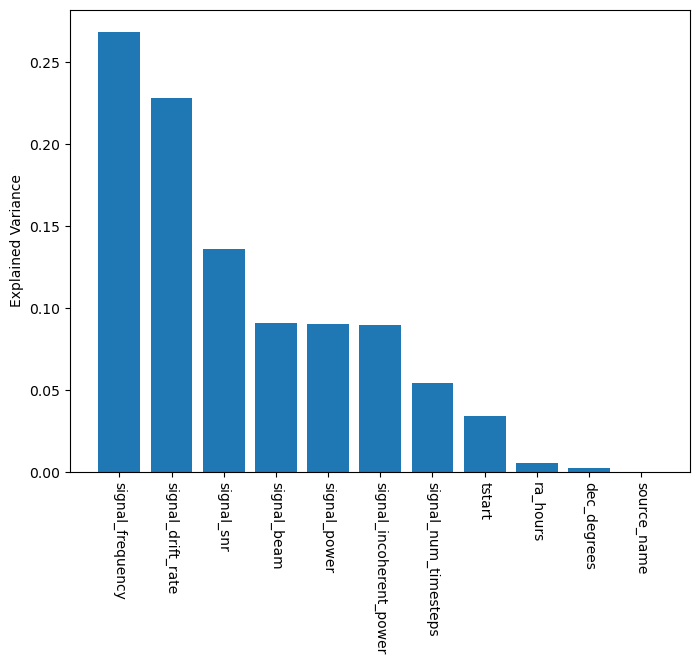

In [9]:
# Plot explained variance
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(data.columns, explained_variance)
plt.xticks(rotation=-90) 
plt.ylabel("Explained Variance")
plt.show()

Text(0, 0.5, 'Variance Explained by Components')

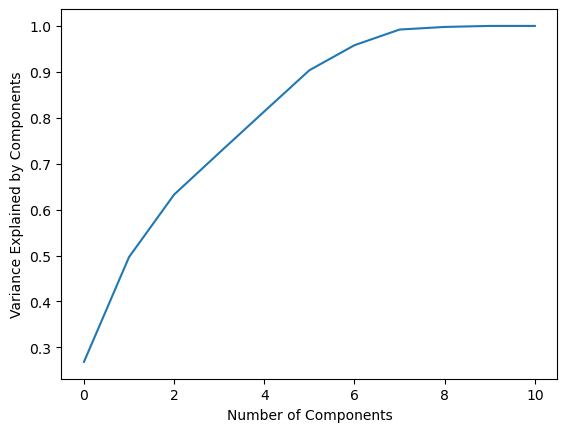

In [10]:
# Plot cumulative variance with number of columns
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(len(data.columns)), cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained by Components")

In [11]:


# Principal components (eigenvectors)
components = pca.components_
print("Principal components (eigenvectors):")
print(components)

Principal components (eigenvectors):
[[-5.17099164e-02  5.15888482e-05  5.64558928e-01  9.67488987e-03
   5.74225593e-01  5.74225593e-01  5.88383484e-02 -8.32010429e-02
  -6.28801959e-02 -5.13995361e-03  6.83442011e-02]
 [ 5.63113588e-01 -4.45528587e-04  7.57070409e-02 -8.71342209e-02
   7.50645013e-02  7.50514436e-02 -3.33598263e-01  2.54602874e-01
   5.43446689e-01  2.79083232e-01 -3.30120255e-01]
 [-2.95139623e-01 -2.10464639e-04  3.67153432e-02 -8.73594041e-02
   3.42207651e-02  3.42104805e-02 -4.63111361e-01  3.35800504e-01
  -1.98383303e-01 -5.29995148e-01 -5.04069990e-01]
 [ 6.91601598e-03 -9.97855097e-01 -1.60644911e-04  4.90415805e-02
  -4.24475160e-04 -4.25050297e-04 -2.33965661e-02 -2.30434422e-02
   1.38297076e-02 -2.11442235e-02  1.07318099e-02]
 [ 5.65626558e-02  6.03022185e-02  2.67188335e-03  9.35663803e-01
   4.09244425e-04  4.03094446e-04 -2.10115994e-01 -8.45659110e-02
   1.50759902e-01 -1.91479175e-01  8.36489084e-02]
 [-1.47203325e-01 -2.54598566e-02  1.17832310e-0

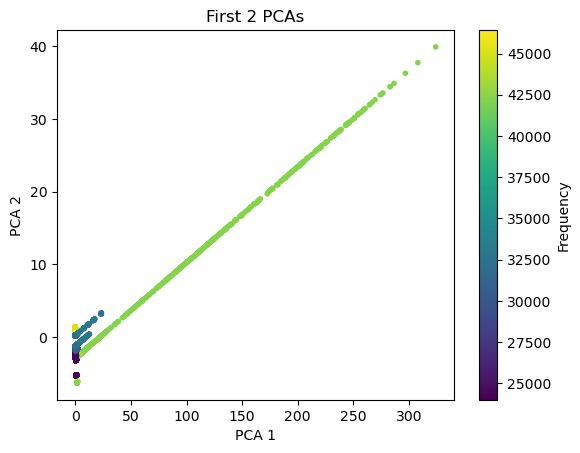

In [17]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], marker=".", c=data["signal_frequency"])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("First 2 PCAs")
plt.colorbar(label="Frequency")
# plt.ylim([-10, 10])
# plt.xlim([-10, 50])
plt.show()

##